In [385]:
# import Necessary Libraries

# For Data Analysis
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Algorithms Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# warning messages
import warnings
warnings. filterwarnings('ignore')


In [327]:

df = pd.read_csv(r"C:\Users\acer\Downloads\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##### Data:
##### The heart CSV dataset contains 303 records and 14 columns, including the target variable.
#### The features include
- age,
- sex, 
- chest pain type (cp), 
- resting blood pressure (trestbps),
- serum cholesterol (chol),
- fasting blood sugar(fbs), 
- resting electrocardiographic results (restecg),
- maximum heart rate achieved (thalach),
- exercise-induced angina (exang),
- ST depression induced by exercise relative to rest (oldpeak),
- the slope of the peak exercise ST segment (slope),
- number of major vessels colored by flourosopy (ca),
- thalassemia (thal).

In [328]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'serum_cholesterol', 'fasting_blood_sugar', 'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
       'exercise_induced_angina', 'ST_depression_induced_by_exercise_relative_to_rest', 'the_slope_of_the_peak_exercise_ST_segment ', 'number_of major_vessels_colored_by_flourosopy', 'thalassemia', 'have_disease_or_not']

In [329]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,ST_depression_induced_by_exercise_relative_to_rest,the_slope_of_the_peak_exercise_ST_segment,number_of major_vessels_colored_by_flourosopy,thalassemia,have_disease_or_not
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [330]:
# Data verifictions - Data type, number of features and rows, missing data, etc

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   age                                                 303 non-null    int64  
 1   sex                                                 303 non-null    int64  
 2   chest_pain_type                                     303 non-null    int64  
 3   resting_blood_pressure                              303 non-null    int64  
 4   serum_cholesterol                                   303 non-null    int64  
 5   fasting_blood_sugar                                 303 non-null    int64  
 6   resting_electrocardiographic_results                303 non-null    int64  
 7   maximum_heart_rate_achieved                         303 non-null    int64  
 8   exercise_induced_angina                             303 non-null    int64  
 9  

In [331]:
# Statistical Analysis of the data

df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,ST_depression_induced_by_exercise_relative_to_rest,the_slope_of_the_peak_exercise_ST_segment,number_of major_vessels_colored_by_flourosopy,thalassemia,have_disease_or_not
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [332]:
# Check for missing Values
print (df.isnull().sum())

age                                                   0
sex                                                   0
chest_pain_type                                       0
resting_blood_pressure                                0
serum_cholesterol                                     0
fasting_blood_sugar                                   0
resting_electrocardiographic_results                  0
maximum_heart_rate_achieved                           0
exercise_induced_angina                               0
ST_depression_induced_by_exercise_relative_to_rest    0
the_slope_of_the_peak_exercise_ST_segment             0
number_of major_vessels_colored_by_flourosopy         0
thalassemia                                           0
have_disease_or_not                                   0
dtype: int64


## Exploratory Data Analysis

### Univariate Analysis

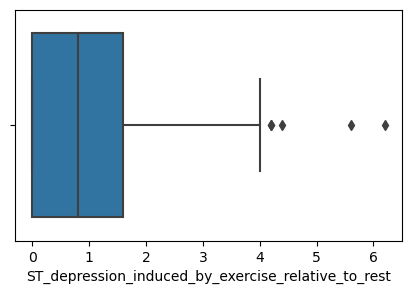

In [333]:
# check for outliers 
plt.figure(figsize=( 5,3))
sns.boxplot(x=df["ST_depression_induced_by_exercise_relative_to_rest"]);

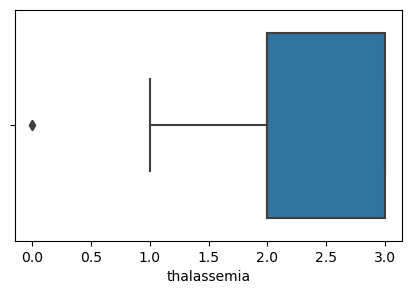

In [334]:
plt.figure(figsize=( 5,3))
sns.boxplot(x=df["thalassemia"]);

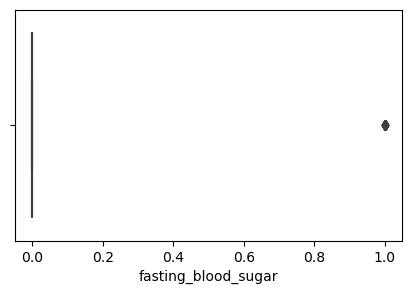

In [335]:
plt.figure(figsize=( 5,3))
sns.boxplot(x=df["fasting_blood_sugar"]);

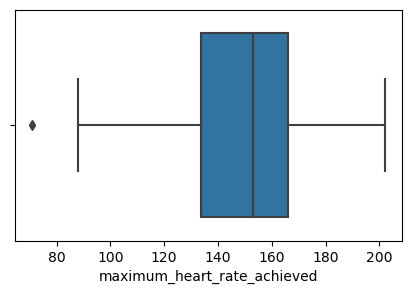

In [336]:
plt.figure(figsize=( 5,3))
sns.boxplot(x=df["maximum_heart_rate_achieved"]);

In [337]:
# Data Visualization 
# Age_bracket

def age_bracket(age):
    if age <= 30:
        return "Youth (<=30)"
    elif age <= 50:
        return "Adult (<=50)"
    elif age <= 65:
        return "Old Adult (<=65)"
    else:
        return "Elder(65 above)"
    
df['age_bracket'] = df['age'].apply(age_bracket)

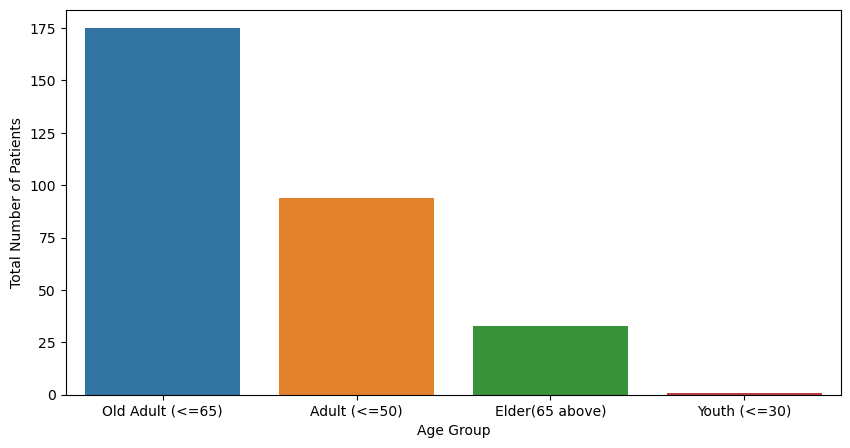

In [338]:
plt.figure(figsize =(10,5))
sns.countplot(x='age_bracket', data=df)
plt.xlabel('Age Group')
plt.ylabel('Total Number of Patients');


In [339]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'serum_cholesterol', 'fasting_blood_sugar',
       'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
       'exercise_induced_angina',
       'ST_depression_induced_by_exercise_relative_to_rest',
       'the_slope_of_the_peak_exercise_ST_segment ',
       'number_of major_vessels_colored_by_flourosopy', 'thalassemia',
       'have_disease_or_not', 'age_bracket'],
      dtype='object')

In [340]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,ST_depression_induced_by_exercise_relative_to_rest,the_slope_of_the_peak_exercise_ST_segment,number_of major_vessels_colored_by_flourosopy,thalassemia,have_disease_or_not
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [341]:
# Sex Visualizations 

def gender(sex):
    if sex==1:
        return"Male"
    else:
        return"Female"
df['gender'] = df['sex']. apply(gender)

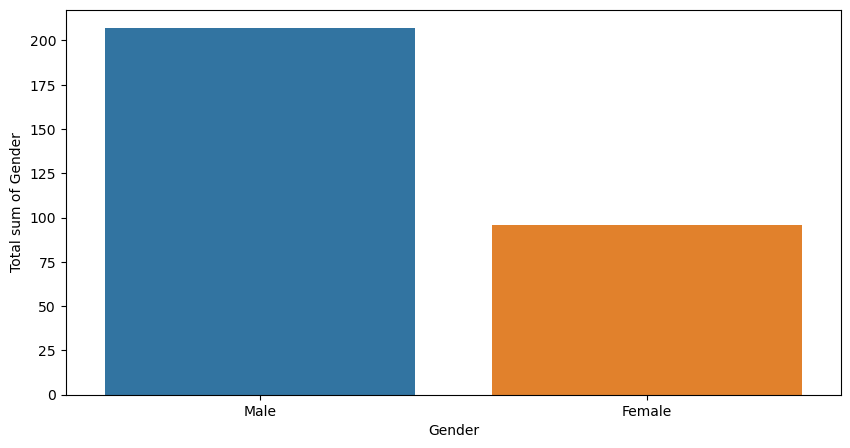

In [342]:
plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Total sum of Gender');

In [343]:
# Chest pain type(1: typical angina, 2: atypical angina, 3: non anginal pain, 4: asymptomatic  )

In [344]:
def Chest_pain(chest_pain_type):
    if chest_pain_type ==1:
        return 'typical angina'
    elif chest_pain_type ==2:
        return 'atypical angina'
    elif chest_pain_type == 3:
        return 'non anginal pain'
    else:
        return 'asymptomatic '
    
df['Chest_pain'] = df['chest_pain_type'].apply(Chest_pain)

#df['Chest_pain'] = df['chest_pain_type'].apply(Chest_pain)



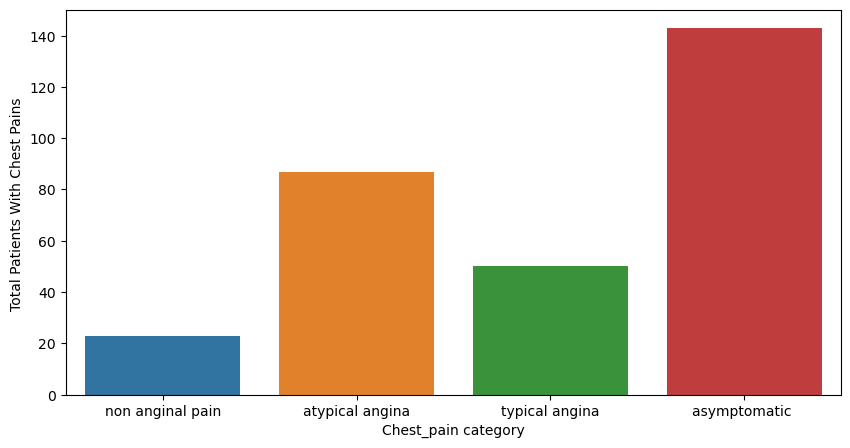

In [345]:
plt.figure(figsize=(10,5))
sns.countplot(x='Chest_pain', data=df)
plt.xlabel('Chest_pain category')
plt.ylabel('Total Patients With Chest Pains ');

In [346]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,ST_depression_induced_by_exercise_relative_to_rest,the_slope_of_the_peak_exercise_ST_segment,number_of major_vessels_colored_by_flourosopy,thalassemia,have_disease_or_not,age_bracket,gender,Chest_pain
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult (<=65),Male,non anginal pain
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult (<=50),Male,atypical angina
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult (<=50),Female,typical angina
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult (<=65),Male,typical angina
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult (<=65),Female,asymptomatic


In [347]:
# To know the number of people that has the have_disease_or_not

def affected(have_disease_or_not):
    if have_disease_or_not ==1:
        return 1
    else:
        return 0
df['affected']= df['have_disease_or_not'].apply (affected)
print(df['affected'].value_counts())

affected
1    165
0    138
Name: count, dtype: int64


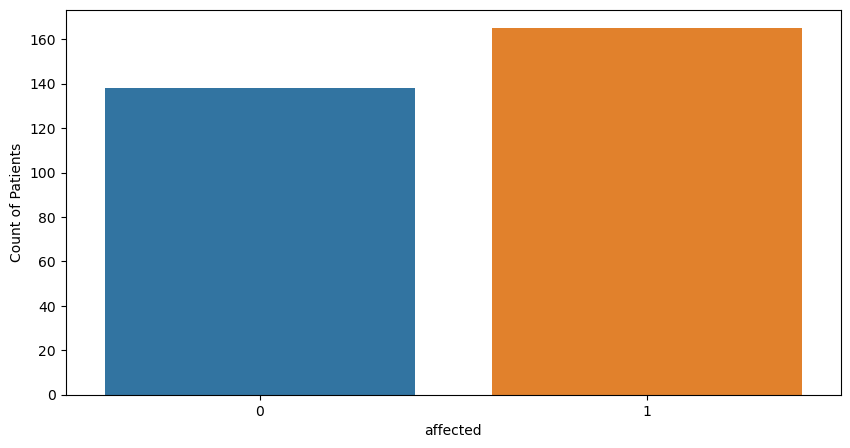

In [348]:
plt.figure(figsize=(10,5))
sns.countplot(x='affected', data = df)
plt. xlabel('affected')
plt.ylabel('Count of Patients');

## Bivariate Analysis

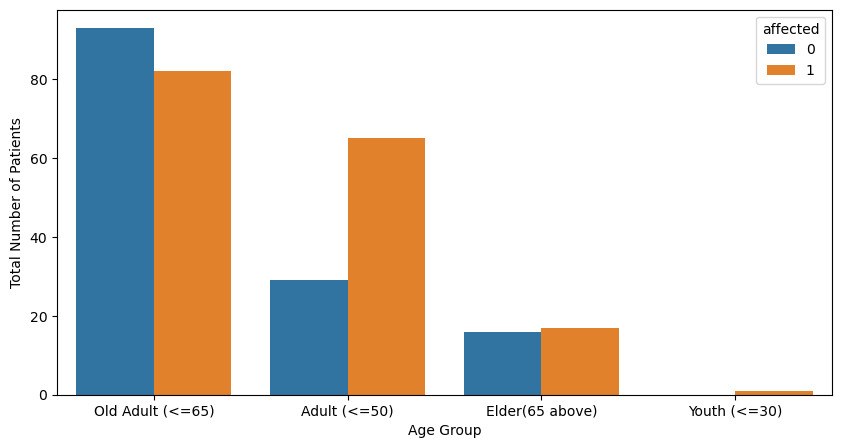

In [349]:
# investigating the age group of patients by the affected  feature.

plt.figure(figsize =(10,5))
sns.countplot(x='age_bracket', data=df, hue='affected' )
plt.xlabel('Age Group')
plt.ylabel('Total Number of Patients');

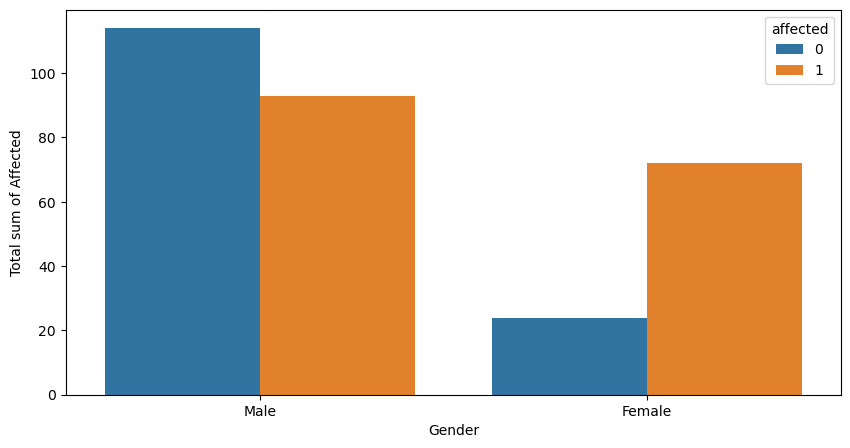

In [350]:
# investingating with Gender




#print(df['affected'].value_counts())

plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=df, hue='affected')
plt.xlabel('Gender')
plt.ylabel('Total sum of Affected');

In [351]:
df.drop('gender', axis=1, inplace=True)


In [352]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,ST_depression_induced_by_exercise_relative_to_rest,the_slope_of_the_peak_exercise_ST_segment,number_of major_vessels_colored_by_flourosopy,thalassemia,have_disease_or_not,age_bracket,Chest_pain,affected
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult (<=65),non anginal pain,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult (<=50),atypical angina,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult (<=50),typical angina,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult (<=65),typical angina,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult (<=65),asymptomatic,1


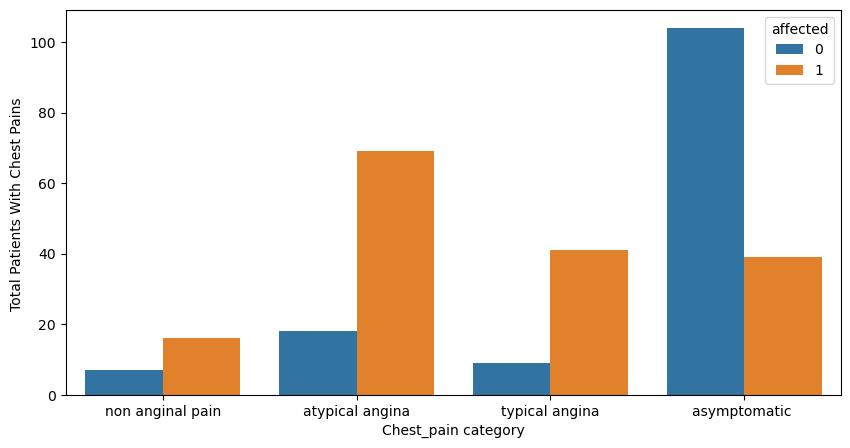

In [353]:
plt.figure(figsize=(10,5))
sns.countplot(x='Chest_pain', data=df, hue='affected')
plt.xlabel('Chest_pain category')
plt.ylabel('Total Patients With Chest Pains ');

## Exploratory Data Analysis - Multivariate Analysis

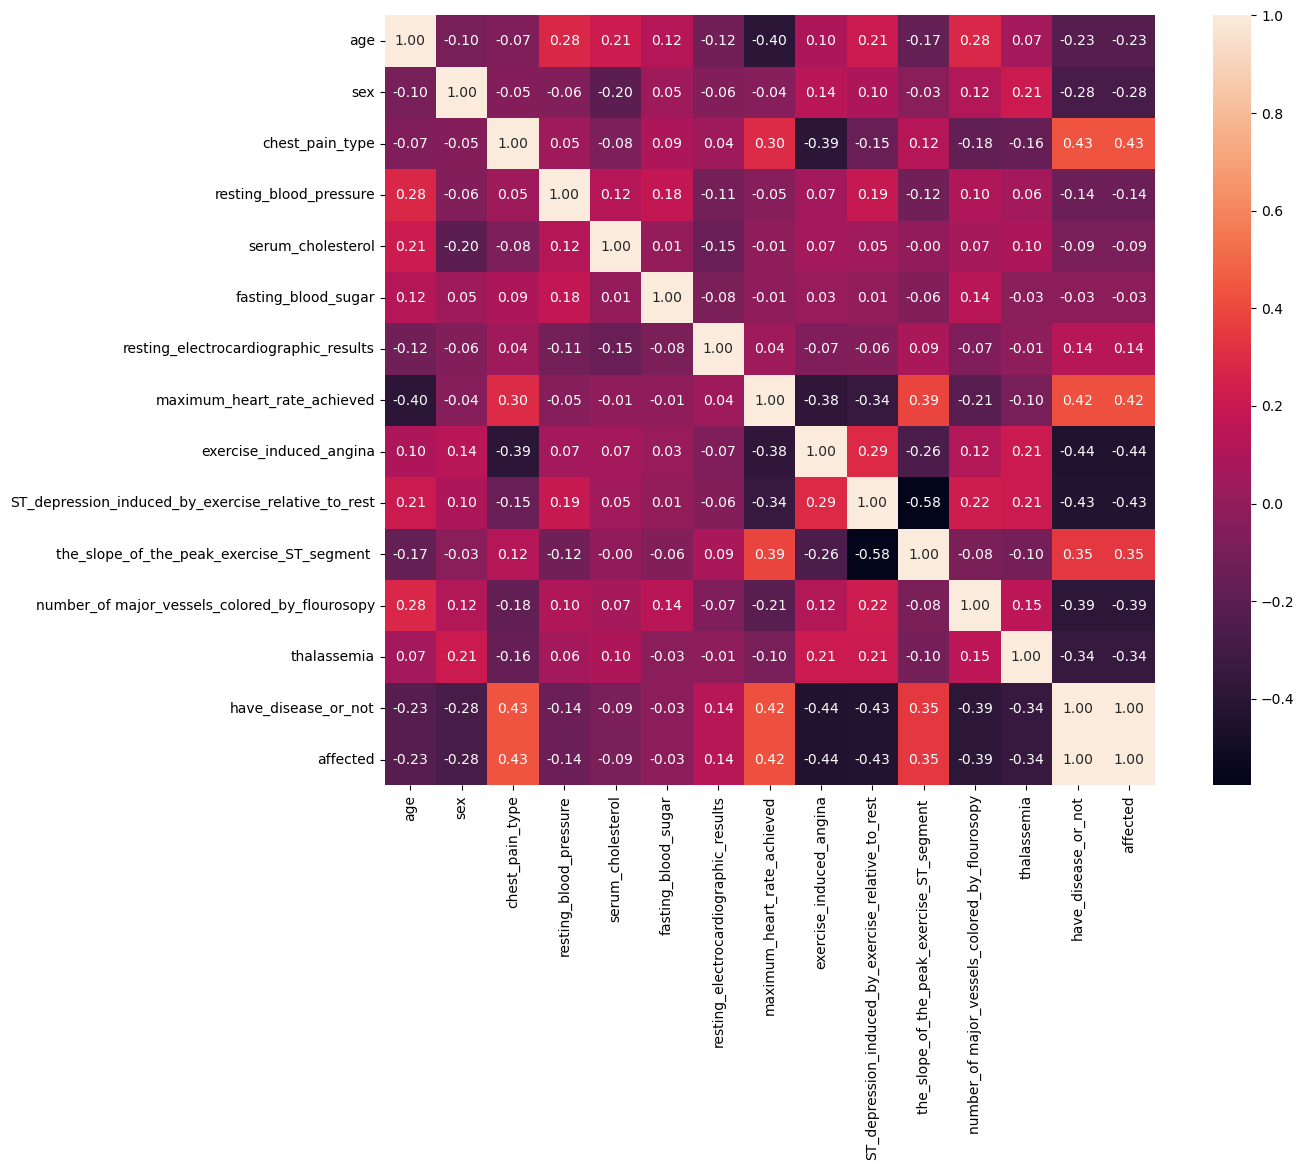

In [354]:
# correlation of symptoms and Heart Disease

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
hm = sns.heatmap(df[numerical_columns].corr(), cbar=True, annot=True,
                 square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()



## Feature Engineering / Data pre-processing

In [355]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,ST_depression_induced_by_exercise_relative_to_rest,the_slope_of_the_peak_exercise_ST_segment,number_of major_vessels_colored_by_flourosopy,thalassemia,have_disease_or_not,age_bracket,Chest_pain,affected
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult (<=65),non anginal pain,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult (<=50),atypical angina,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult (<=50),typical angina,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult (<=65),typical angina,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult (<=65),asymptomatic,1


In [356]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'serum_cholesterol', 'fasting_blood_sugar',
       'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
       'exercise_induced_angina',
       'ST_depression_induced_by_exercise_relative_to_rest',
       'the_slope_of_the_peak_exercise_ST_segment ',
       'number_of major_vessels_colored_by_flourosopy', 'thalassemia',
       'have_disease_or_not', 'age_bracket', 'Chest_pain', 'affected'],
      dtype='object')

In [357]:
df1 = df[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'serum_cholesterol','fasting_blood_sugar',
       'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
       'exercise_induced_angina',
       'ST_depression_induced_by_exercise_relative_to_rest',
       'the_slope_of_the_peak_exercise_ST_segment ',
       'number_of major_vessels_colored_by_flourosopy', 'thalassemia',
       ]]

have_disease_or_not = df[['affected']]

In [358]:
df1.index

RangeIndex(start=0, stop=303, step=1)

In [359]:
have_disease_or_not.head()

,affected
0,1
1,1
2,1
3,1
4,1


In [360]:
df1.dtypes

age                                                     int64
sex                                                     int64
chest_pain_type                                         int64
resting_blood_pressure                                  int64
serum_cholesterol                                       int64
fasting_blood_sugar                                     int64
resting_electrocardiographic_results                    int64
maximum_heart_rate_achieved                             int64
exercise_induced_angina                                 int64
ST_depression_induced_by_exercise_relative_to_rest    float64
the_slope_of_the_peak_exercise_ST_segment               int64
number_of major_vessels_colored_by_flourosopy           int64
thalassemia                                             int64
dtype: object

In [361]:
# dealing with Outliers - 'resting_blood_pressure','serum_cholesterol','thalassemia ','maximum_heart_rate_achieved' 

#Normalize the Data




from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df1['Scaled_RBP'] = scaler.fit_transform(df1[['resting_blood_pressure']].values.reshape(-1, 1))

df1['Scaled_Chlo'] = scaler.fit_transform(df1[['serum_cholesterol']].values.reshape(-1, 1))

df1['Scaled_Thal'] = scaler.fit_transform(df1[['thalassemia']].values.reshape(-1, 1))

df1['Scaled_MHR_Achieved'] = scaler.fit_transform(df1[['maximum_heart_rate_achieved']].values.reshape(-1, 1))

df1.drop(['resting_blood_pressure', 'thalassemia', 'maximum_heart_rate_achieved'], axis=1, inplace=True)



df1.head()

,age,sex,chest_pain_type,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,exercise_induced_angina,ST_depression_induced_by_exercise_relative_to_rest,the_slope_of_the_peak_exercise_ST_segment,number_of major_vessels_colored_by_flourosopy,Scaled_RBP,Scaled_Chlo,Scaled_Thal,Scaled_MHR_Achieved
0,63,1,3,233,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,250,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,204,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,236,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,354,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


In [362]:
df1.dtypes

age                                                     int64
sex                                                     int64
chest_pain_type                                         int64
serum_cholesterol                                       int64
fasting_blood_sugar                                     int64
resting_electrocardiographic_results                    int64
exercise_induced_angina                                 int64
ST_depression_induced_by_exercise_relative_to_rest    float64
the_slope_of_the_peak_exercise_ST_segment               int64
number_of major_vessels_colored_by_flourosopy           int64
Scaled_RBP                                            float64
Scaled_Chlo                                           float64
Scaled_Thal                                           float64
Scaled_MHR_Achieved                                   float64
dtype: object

## Machine Learning


In [363]:
# Split the dataset into training and testing sets X = Questions and Y = Answers

X_train, X_test, y_train, y_test = train_test_split(df1, have_disease_or_not, test_size =0.2, random_state=42)

In [364]:
X_train.head()

,age,sex,chest_pain_type,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,exercise_induced_angina,ST_depression_induced_by_exercise_relative_to_rest,the_slope_of_the_peak_exercise_ST_segment,number_of major_vessels_colored_by_flourosopy,Scaled_RBP,Scaled_Chlo,Scaled_Thal,Scaled_MHR_Achieved
132,42,1,1,295,0,1,0,0.0,2,0,0.245283,0.385845,0.666667,0.694656
202,58,1,0,270,0,0,1,0.8,2,0,0.528302,0.328767,1.000000,0.305344
196,46,1,2,231,0,1,0,3.6,1,0,0.528302,0.239726,0.666667,0.580153
75,55,0,1,250,0,0,0,1.4,1,0,0.386792,0.283105,0.666667,0.687023
176,60,1,0,230,1,1,1,1.4,2,2,0.216981,0.237443,1.000000,0.679389


In [365]:
y_train.head()

,affected
132,1
202,0
196,0
75,1
176,0


In [366]:
# Model Building 

# Logistics Regression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

log_pred = logreg.predict(X_test)

print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test,log_pred))
print('Precision:', precision_score(y_test,log_pred))
print('Recall:', recall_score(y_test,log_pred))
print('F1-score:', f1_score(y_test,log_pred))
print('AUC-ROC:', roc_auc_score(y_test,log_pred))


Logistic Regression
Accuracy: 0.8524590163934426
Precision: 0.896551724137931
Recall: 0.8125
F1-score: 0.8524590163934426
AUC-ROC: 0.8545258620689655


In [367]:
X_test

,age,sex,chest_pain_type,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,exercise_induced_angina,ST_depression_induced_by_exercise_relative_to_rest,the_slope_of_the_peak_exercise_ST_segment,number_of major_vessels_colored_by_flourosopy,Scaled_RBP,Scaled_Chlo,Scaled_Thal,Scaled_MHR_Achieved
179,57,1,0,276,0,0,1,0.6,1,1,0.528302,0.342466,0.333333,0.312977
228,59,1,3,288,0,0,0,0.2,1,0,0.716981,0.369863,1.000000,0.671756
111,57,1,2,126,1,1,0,0.2,2,1,0.528302,0.000000,1.000000,0.778626
246,56,0,0,409,0,0,1,1.9,1,2,0.377358,0.646119,1.000000,0.603053
60,71,0,2,265,1,0,0,0.0,2,1,0.150943,0.317352,0.666667,0.450382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,254,0,0,0,2.0,1,3,0.433962,0.292237,1.000000,0.572519
104,50,1,2,196,0,1,0,0.0,2,0,0.330189,0.159817,0.666667,0.702290
300,68,1,0,193,1,1,0,3.4,1,2,0.471698,0.152968,1.000000,0.534351
193,60,1,0,282,0,0,1,2.8,1,2,0.481132,0.356164,1.000000,0.541985


In [368]:
log_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [369]:
y_test

,affected
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


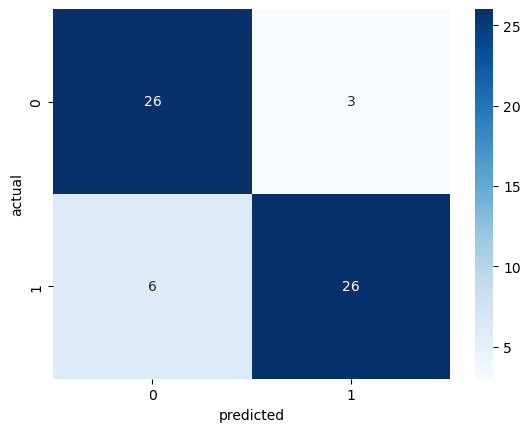

In [370]:
# Create a Confusion Matrix
cfm = confusion_matrix(y_test,log_pred)

# Visualize the confusion matrix
sns.heatmap(cfm,annot=True,cmap='Blues',fmt='g')
plt.xlabel('predicted')
plt.ylabel('actual');

In [371]:
# Logistics Regression




from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rcf_pred = rfc.predict(X_test)

print('Random Forest Classifier')
print('Accuracy:', accuracy_score(y_test, rcf_pred))
print('Precision:', precision_score(y_test, rcf_pred))
print('Recall:', recall_score(y_test, rcf_pred))
print('F1-score:', f1_score(y_test, rcf_pred))
print('AUC-ROC:', roc_auc_score(y_test, rcf_pred))


Random Forest Classifier
Accuracy: 0.8688524590163934
Precision: 0.8529411764705882
Recall: 0.90625
F1-score: 0.8787878787878787
AUC-ROC: 0.8669181034482758


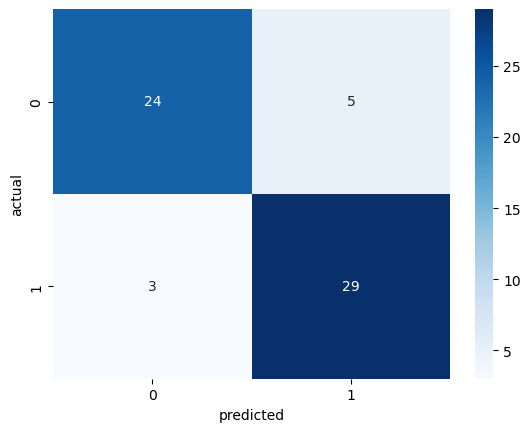

In [372]:
rfc = confusion_matrix(y_test,rcf_pred)

# Visualize the confusion matrix
sns.heatmap(rfc,annot=True,cmap='Blues',fmt='g')
plt.xlabel('predicted')
plt.ylabel('actual');

In [373]:
rcf_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [374]:
y_test

,affected
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


In [375]:
y_train

,affected
132,1
202,0
196,0
75,1
176,0
...,...
188,0
71,1
106,1
270,0


In [386]:
classifiers = [[XGBClassifier(),'XGBclassifier'], 
               [RandomForestClassifier(),'Random Forest'],
               [DecisionTreeClassifier(random_state = 42),'Decision Tree'],
               [SVC(),'SVC'],
               [KNeighborsClassifier(),'K-Nearest Neighbors'],
               [SGDClassifier(),'SGD Classifier'],
               [LogisticRegression(),'Logestic Regression'],
               [GaussianNB(),'Naive Bayes']
              ]

In [388]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  'XGBclassifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [DecisionTreeClassifier(random_state=42), 'Decision Tree'],
 [SVC(), 'SVC'],
 [KNeighborsClassifier(), 'K-Nearest Neighbors'],
 [SGDClassifier(), 'SGD C

In [445]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier [0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test,pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print('')

In [446]:
print('Accuracy Score')
S1 = pd.DataFrame (acc_list)
S1.head()

Accuracy Score


,XGBclassifier,Random Forest,Decision Tree,SVC,K-Nearest Neighbors,SGD Classifier,Logestic Regression,Naive Bayes
0,81.97%,85.25%,83.61%,52.46%,63.93%,47.54%,85.25%,85.25%


In [447]:
print('Precision Score')
S2 = pd.DataFrame (precision_list)
S2.head()

Precision Score


,XGBclassifier,Random Forest,Decision Tree,SVC,K-Nearest Neighbors,SGD Classifier,Logestic Regression,Naive Bayes
0,86.21%,84.85%,92.31%,52.46%,64.71%,0.0%,89.66%,89.66%


In [448]:
print('Recall Score')
S3 = pd.DataFrame (recall_list)
S3.head()

Recall Score


,XGBclassifier,Random Forest,Decision Tree,SVC,K-Nearest Neighbors,SGD Classifier,Logestic Regression,Naive Bayes
0,78.12%,87.5%,75.0%,100.0%,68.75%,0.0%,81.25%,81.25%


In [449]:
print('ROC Score')
S4 = pd.DataFrame (roc_list)
S4.head()

ROC Score


,XGBclassifier,Random Forest,Decision Tree,SVC,K-Nearest Neighbors,SGD Classifier,Logestic Regression,Naive Bayes
0,82.17%,85.13%,84.05%,50.0%,63.69%,50.0%,85.45%,85.45%
